**Dataset: Payment Fraud Detection**
Dataset link: https://drive.google.com/file/d/1gXW4hqSThkNeLJQnQZatctvzj05bkgqV/view?usp=sharing

In [41]:
# prompt: load the data set from the above google drive

import pandas as pd

# Load the dataset into a pandas DataFrame
fraud_data = pd.read_csv('payment_fraud.csv')

# Now you can work with the DataFrame 'df'
# For example, display the first few rows:
fraud_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_name                     51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Target                            51000 non-null  int64  
dtypes: f

In [5]:
fraud_data.head()

,Customer_name,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Target
0,Xr7Yi3Hv6Bk8Yi6T,4174,1292.76,ATM Withdrawal,16.0,Tablet,mumbai,0,119,13,Debit Card,0
1,Sj9Ik0Wt6Ky6Mu9U,4507,1554.58,ATM Withdrawal,13.0,Mobile,delhi,4,79,3,Credit Card,0
2,Lh9Rf5Dq8Nm3Sx8W,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,Mx3Tn2At7Es9Ox4P,2294,100.10,Bill Payment,15.0,Desktop,bangalore,4,3,4,UPI,0
4,Zs2Kd7Vl3On1Gq5E,2130,1490.50,POS Payment,19.0,Mobile,mumbai,2,57,7,Credit Card,0


In [6]:
fraud_data.shape

(51000, 12)

1. Create and analyze descriptive statistics for each column in the dataset. Include measures such as mean, median, standard deviation, min/max, 25th / 50th / 75th percentiles,skewness, and kurtosis values for numerical columns, and frequency counts and mode for categorical columns. Based on the descriptive statistics, summarize your findings about each feature.

In [70]:
# Numerical Stats
from scipy.stats import skew, kurtosis, mode

num_fraud_data_col= fraud_data.select_dtypes(include=['float64','int64']).columns
numerical_stats= fraud_data[num_fraud_data_col].describe()
numerical_stats.loc['skewness']= fraud_data[num_fraud_data_col].apply(lambda x: skew(x))
numerical_stats.loc['kurtosis']= fraud_data[num_fraud_data_col].apply(lambda x: kurtosis(x))
numerical_stats.loc['mode']= fraud_data[num_fraud_data_col].apply(lambda x: mode(x)[0])

# scipy.stats.mode() expects only numerical data  but pandas.Series.mode() can take categorical data

print("Numerical Columns Descriptive Statistics:")

numerical_stats

Numerical Columns Descriptive Statistics:


,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Target
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000
skewness,-0.001565,NaN,NaN,0.004440,-0.002970,0.005220,4.167792
kurtosis,-1.201213,NaN,NaN,-1.298786,-1.197096,-1.205375,15.370488


In [ ]:
# Categorical column stats
from scipy.stats import mode 
cat_col= fraud_data.select_dtypes(include=['object']).columns
cat_stats= {}


for col in cat_col:
    cat_stats[col]= {
        'mode': fraud_data[col].mode()[0],
        'frequency_counts': fraud_data[col].value_counts()
    }


for col, stats in cat_stats.items():
    print(f'\n column: {col}')
    print(f'\n mode: {stats['mode']}')
    print(f'\n frequency count: \n {stats['frequency_counts']}')



 column: Customer_name

 mode: Aa0Cc2Gy9Df8Bj4Y

 frequency count: 
 Customer_name
Ow9Nk7Ka1Mp3Qx4E    1
Xr7Yi3Hv6Bk8Yi6T    1
Sj9Ik0Wt6Ky6Mu9U    1
Lh9Rf5Dq8Nm3Sx8W    1
Mx3Tn2At7Es9Ox4P    1
                   ..
Qw4Cm9Bm0Vr2Ua4F    1
Nr1Jd4Hj7Ye1Fw9X    1
Zh8Nq2Ma3Sa2Cg3V    1
Yi4Pk7Yx9Ka4Mo6G    1
Sd7Pb7Kv0Qx9Jp2U    1
Name: count, Length: 51000, dtype: int64

 column: Transaction_Type

 mode: Bill Payment

 frequency count: 
 Transaction_Type
Bill Payment       10340
Bank Transfer      10276
ATM Withdrawal     10164
POS Payment        10126
Online Purchase    10094
Name: count, dtype: int64

 column: Device_Used

 mode: Desktop

 frequency count: 
 Device_Used
Desktop           15795
Mobile            15614
Tablet            15588
Unknown Device     1530
Name: count, dtype: int64

 column: Location

 mode: chennai

 frequency count: 
 Location
chennai      6149
delhi        6110
pune         6104
bangalore    6071
kolkata      6031
Ahmedabad    6012
hydrabad     5991
mumbai      

2. Analyze missing values in the dataset:
(a) Identify which features contain missing values and quantify them both in terms of rows and columns.
(b) Create appropriate visualization(s) to clearly display the pattern of missing values across the entire dataset. (Hint: can you create a plot which contains a rectangular block representing the entire dataset, with missing values highlighted in a different colour within this block?)
(c) Based on your observations, propose and implement appropriate handling strategies for the missing values. Justify your approach for each feature.
(d) After implementing your strategy, report the final data size. Are there any rows or
columns that were completely dropped? Explain why.

In [81]:
# Identify which features contain missing values and quantify them both in terms of rows and columns.

missing_vaules= fraud_data.isnull().sum()


# Quantify missing values
missing_values_summary = pd.DataFrame({
    'Feature': missing_vaules.index,
    'Missing Values': missing_vaules.values,
    'Percentage': (missing_vaules.values / len(fraud_data)) * 100
})

missing_values_summary= missing_values_summary[missing_values_summary['Missing Values']>0].sort_values(by='Missing Values', ascending=False)
print('features with missing vaules:')
missing_values_summary



features with missing vaules:


,Feature,Missing Values,Percentage
4,Time_of_Transaction,2552,5.003922
6,Location,2547,4.994118
2,Transaction_Amount,2520,4.941176
5,Device_Used,2473,4.849020
10,Payment_Method,2469,4.841176


In [ ]:
# rows with missing vaules 
rows_with_missing_val= fraud_data.isnull().sum(axis=1).sum()
print(f'\n rows with atleast one missing values: {rows_with_missing_val}')


 rows with missing values: 12561


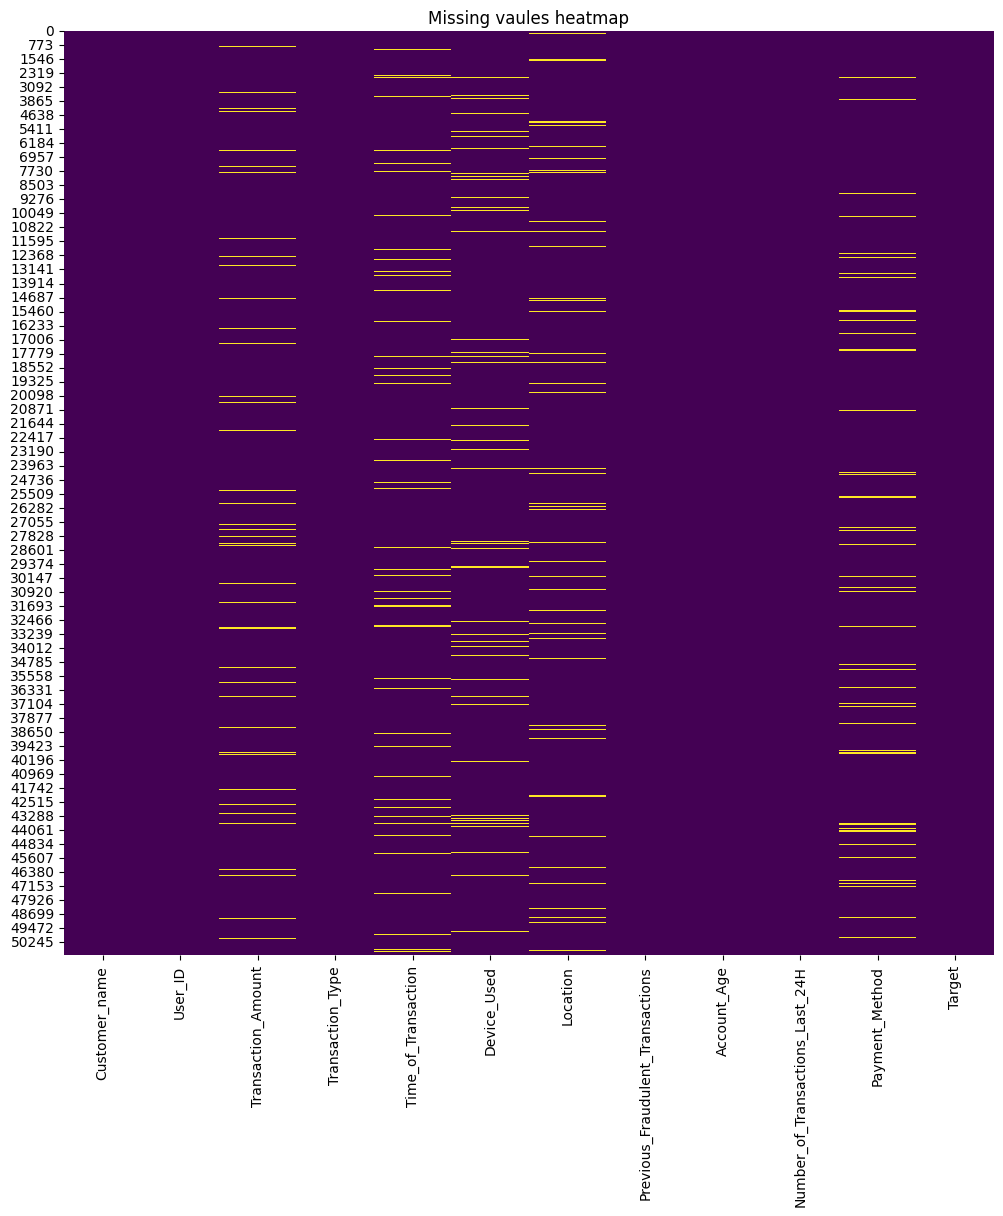

In [84]:
# Create appropriate visualization(s) to clearly display the pattern of missing values across the entire dataset. 
# (Hint: can you create a plot which contains a rectangular block representing the entire dataset, 
# with missing values highlighted in a different colour within this block?)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(fraud_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing vaules heatmap')
plt.show()